In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red'],
    'Size': ['S', 'M', 'L', 'XL', 'M']
})
print(data)

encoder = OneHotEncoder()
encoded = encoder.fit_transform(data).toarray()
print(encoder.get_feature_names_out())
print(encoded)


   Color Size
0    Red    S
1  Green    M
2   Blue    L
3  Green   XL
4    Red    M
['Color_Blue' 'Color_Green' 'Color_Red' 'Size_L' 'Size_M' 'Size_S'
 'Size_XL']
[[0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0.]]


# **8**

In [6]:
import numpy as np

def one_hot_encode_words(text):
    words = text.lower().split()
    unique_words = sorted(list(set(words)))
    word_to_int = {word: i for i, word in enumerate(unique_words)}
    vocab_size = len(unique_words)

    one_hot_encoded_vectors = {}
    all_vectors = []
    for word in words:
        vector = np.zeros(vocab_size, dtype=int)
        vector[word_to_int[word]] = 1
        one_hot_encoded_vectors[word] = vector
        all_vectors.append(vector)

    return one_hot_encoded_vectors, word_to_int, np.array(all_vectors)

print("--- Word One-Hot Encoding Example ---")
sentence = "The cat sat on the mat"
word_vectors, word_vocab, word_array = one_hot_encode_words(sentence)

print("Original Sentence:", sentence)
for word, vector in word_vectors.items():
    print(f"'{word}': {vector}")

print("\nEncoded sequence of vectors for the sentence:")
print(word_array)
print("-" * 40 + "\n")

--- Word One-Hot Encoding Example ---
Original Sentence: The cat sat on the mat
'the': [0 0 0 0 1]
'cat': [1 0 0 0 0]
'sat': [0 0 0 1 0]
'on': [0 0 1 0 0]
'mat': [0 1 0 0 0]

Encoded sequence of vectors for the sentence:
[[0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]]
----------------------------------------



# **2**

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

VOCAB_SIZE = 10000
MAX_LEN = 256
EMBEDDING_DIM = 16
BATCH_SIZE = 512
EPOCHS = 10

print("Loading IMDB dataset...")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)

print(f"Number of training sequences: {len(train_data)}")
print(f"Number of testing sequences: {len(test_data)}")

print("Padding sequences...")
train_data = pad_sequences(train_data, maxlen=MAX_LEN, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"Shape of training data after padding: {train_data.shape}")
print(f"Shape of testing data after padding: {test_data.shape}")

print("Building the model...")
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_shape=[MAX_LEN]),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

print("Compiling the model...")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

print("\n--- Training the model ---")
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

print("\n--- Evaluating the model ---")
results = model.evaluate(test_data, test_labels, verbose=2)
print(f"\nTest Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

prediction = model.predict(test_data[0:1])
print(f"\nPrediction for first test review: {prediction[0][0]:.4f}")
print(f"Actual label for first test review: {test_labels[0]}")
print("A prediction > 0.5 is considered positive, and <= 0.5 is negative.")

Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Number of training sequences: 25000
Number of testing sequences: 25000
Padding sequences...
Shape of training data after padding: (25000, 256)
Shape of testing data after padding: (25000, 256)
Building the model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 256, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,289 (626.13 KB)

 Trainable params: 160,289 (626.13 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the model ---
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5243 - loss: 0.6922 - val_accuracy: 0.6442 - val_loss: 0.6874
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6019 - loss: 0.6851 - val_accuracy: 0.7114 - val_loss: 0.6771
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6498 - loss: 0.6721 - val_accuracy: 0.7354 - val_loss: 0.6582
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6871 - loss: 0.6498 - val_accuracy: 0.7611 - val_loss: 0.6302
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7282 - loss: 0.6200 - val_accuracy: 0.7601 - val_loss: 0.5918
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7531 - loss: 0.5815 - val_accuracy: 0.7982 - val_loss: 0.5494
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7773 - loss: 0.5405 - val_accuracy: 0.8084 - val_loss: 0.5074
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7917 - loss: 0.5050 - val

# **4**

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=feature_names)
y = pd.Series(target, name='MEDV')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.summary()

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error on Test Data: {mae:.2f}")

test_predictions = model.predict(X_test_scaled).flatten()

print("\n--- Example Predictions ---")
for i in range(5):
    print(f"Predicted Price: {test_predictions[i]:.2f}, Actual Price: {y_test.iloc[i]:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 602.7761 - mean_absolute_error: 22.5738 - val_loss: 525.9553 - val_mean_absolute_error: 21.3836
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 590.6907 - mean_absolute_error: 22.1550 - val_loss: 484.6642 - val_mean_absolute_error: 20.4034
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 527.4160 - mean_absolute_error: 21.0012 - val_loss: 433.3824 - val_mean_absolute_error: 19.1286
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 457.3023 - mean_absolute_error: 19.1175 - val_loss: 366.2336 - val_mean_absolute_error: 17.3258
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 379.6212 - mean_absolute_error: 17.2334 - val_loss: 284.4872 - val_mean_absolute_error: 14.9406
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 305.4287 - mean_absolute_error: 14.9135 - val_loss: 196.5080 - val_mean_absolute_error: 12.0449
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 195.430

# **6**

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 - 7s - 1s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5500 - val_loss: 0.6931
Epoch 2/15
5/5 - 1s - 106ms/step - accuracy: 0.5100 - loss: 0.6932 - val_accuracy: 0.4750 - val_loss: 0.6932
Epoch 3/15
5/5 - 5s - 1s/step - accuracy: 0.5300 - loss: 0.6931 - val_accuracy: 0.5750 - val_loss: 0.6931
Epoch 4/15
5/5 - 1s - 124ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.6500 - val_loss: 0.6930
Epoch 5/15
5/5 - 1s - 129ms/step - accuracy: 0.4800 - loss: 0.6932 - val_accuracy: 0.4250 - val_loss: 0.6932
Epoch 6/15
5/5 - 1s - 105ms/step - accuracy: 0.5700 - loss: 0.6931 - val_accuracy: 0.6250 - val_loss: 0.6930
Epoch 7/15
5/5 - 1s - 123ms/step - accuracy: 0.4600 - loss: 0.6932 - val_accuracy: 0.4750 - val_loss: 0.6932
Epoch 8/15
5/5 - 1s - 121ms/step - accuracy: 0.5900 - loss: 0.6931 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 9/15
5/5 - 1s - 257ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4750 - val_loss: 0.6932
Epoch 10/15
5/5 - 1s - 12

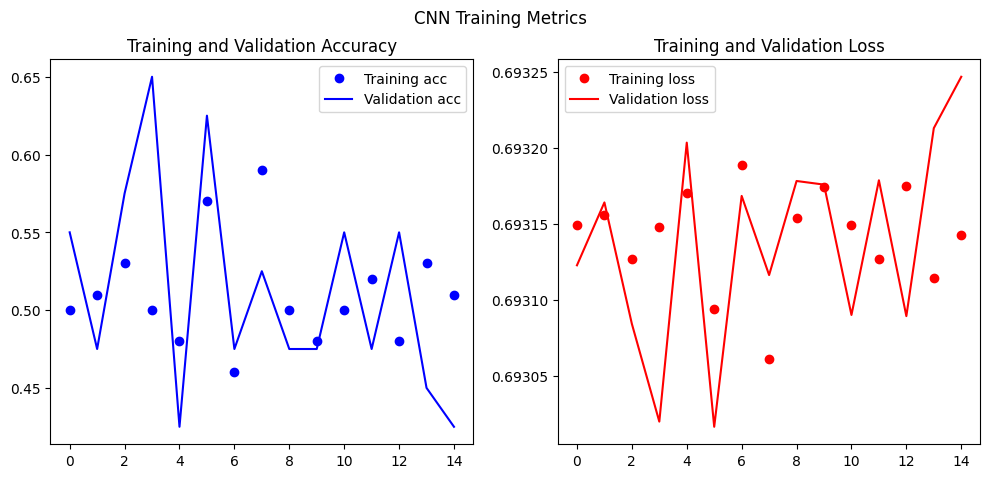

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image

base_dir = 'cats_and_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.makedirs(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir)

def create_dummy_files(directory, prefix, num_files):
    for i in range(num_files):
        with open(os.path.join(directory, f'{prefix}.{i}.jpg'), 'w') as f:
            f.write(f'Dummy: {prefix} {i}')

create_dummy_files(train_cats_dir, 'cat', 100)
create_dummy_files(train_dogs_dir, 'dog', 100)
create_dummy_files(validation_cats_dir, 'cat', 50)
create_dummy_files(validation_dogs_dir, 'dog', 50)

def create_pixel_image(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = Image.new('RGB', (150, 150), color='black')
            img.save(os.path.join(directory, filename))

create_pixel_image(train_cats_dir)
create_pixel_image(train_dogs_dir)
create_pixel_image(validation_cats_dir)
create_pixel_image(validation_dogs_dir)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=2,
    verbose=2
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.suptitle('CNN Training Metrics')
plt.show()

shutil.rmtree(base_dir)
